In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos
from scipy.signal import hilbert

def low_pass_filter(data, band_limit, sampling_rate):
    data = np.array(data)
    cutoff_index = int(band_limit * data.size / sampling_rate)
    F = np.fft.fft(data)
    F[cutoff_index + 1 : -cutoff_index] = 0
    return np.fft.ifft(F).real

/home/kelu/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
Fech = 64
p = "../usb/20210117173109.npz"
f = np.load(p)
s = f["signal"]
a = np.average(s[::2],axis=0)
t = [x/Fech for x in range(len(a))]

### Going for demodulation

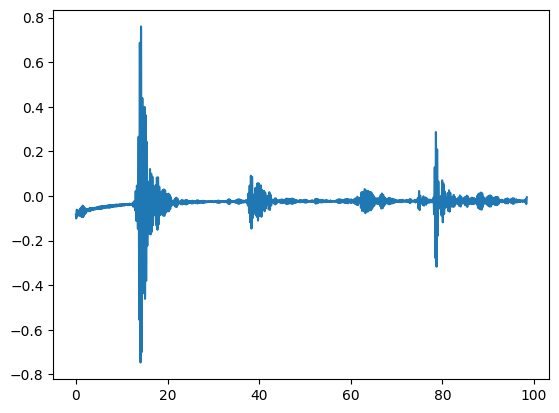

In [5]:

S = a[700:7000]
T = [x/Fech for x in range(len(S))]
plt.plot(T,S)

In [27]:
F= 3.5
COS = [cos(2*np.pi*F*x)  for x in T]
SIN = [sin(2*np.pi*F*x)  for x in T]

I = []
Q = []
E = []
for k in range(len(S)):
    I.append(S[k]*COS[k])
    Q.append(S[k]*SIN[k])
    E.append(np.sqrt(COS[k]**2+SIN[k]**2))
if 0:
    plt.plot(T,S,color='black')
    plt.plot(T,I,color='red',alpha=0.3)
    plt.plot(T,Q,color='green',alpha=0.3)
    #plt.xlim([10, 20])

In [28]:
checkSpectrum = False
fs = [64*x/(len(S)) for x in range(len(S))]
if checkSpectrum:
    plt.plot(fs[10:-10],np.real(np.fft.fft(S))[10:-10])

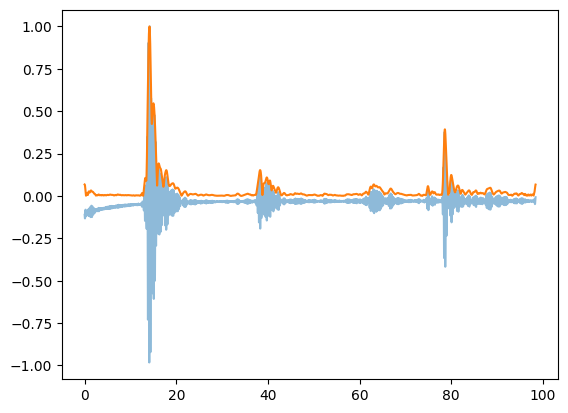

In [29]:
LOW_I = low_pass_filter(I, 2, 64)
LOW_Q = low_pass_filter(Q, 2, 64)

H = np.sqrt(np.array(LOW_I)**2 + np.array(LOW_Q)**2)

plt.plot(T,np.array(S)/np.max(S), alpha=0.5)
plt.plot(T,np.array(H)/np.max(H))

Text(0.5, 1.0, 'Spectrum - signal, IQ, demod')

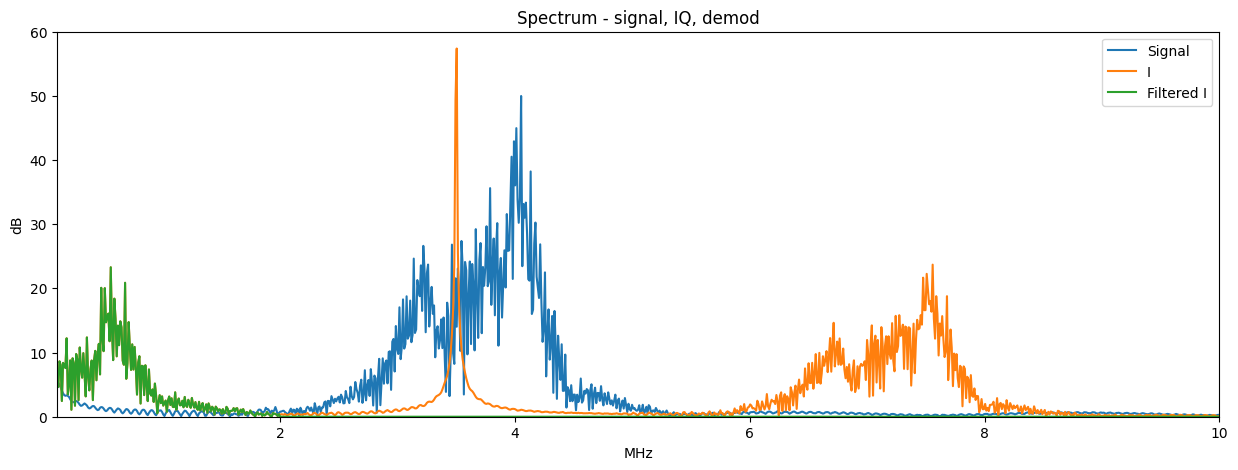

In [33]:
plt.figure(figsize=(15, 5))

plt.plot(fs,np.abs(np.fft.fft(S)),label="Signal")
plt.plot(fs,np.abs(np.fft.fft(I)),label="I")
plt.plot(fs,np.abs(np.fft.fft(LOW_I)),label = "Filtered I")
plt.xlim(0.1, 10)
plt.ylim(0.0, 60)
plt.xlabel("MHz")
plt.ylabel("dB")
plt.legend()
plt.title("Spectrum - signal, IQ, demod")

In [39]:
from scipy.signal import butter as bp
from scipy import signal

(-0.1, 1.1)

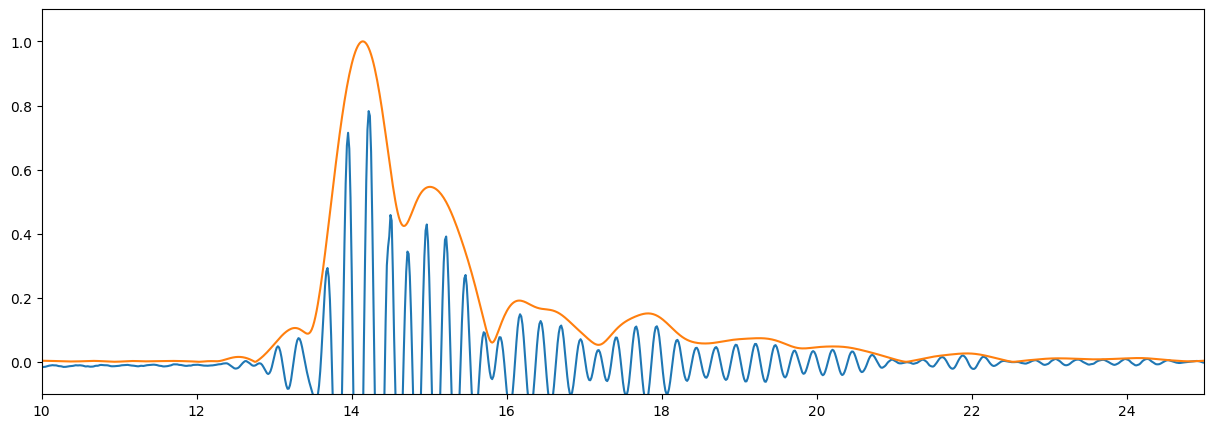

In [44]:
plt.figure(figsize=(15, 5))

rS = low_pass_filter(S, 20, 64) - np.mean(S)

plt.plot(T,rS)
plt.plot(T,np.array(H)/np.max(H))

plt.xlim(10, 25)
plt.ylim(-0.1, 1.1)